# Доставка Еды: анализ

<img src='https://avatars.mds.yandex.net/get-altay/4667561/2a00000179894ed9fa6c51c04a69bdcfb562/XXXL'>

# Описание

Доставка еды осуществляется из ресторанов и продуктов из магазинов через мобильные приложения или веб-сайт. Доставку осуществляют курьерские службы, курьеры-партнёры сервиса, водители-партнёры и собственные курьеры ресторанов. На выбор доступны пиццерии, пекарни, рестораны грузинской и японской кухни, бургерные, стейк-хаусы, а также продуктовые магазины. 

В наборе данных информация о заказах по Москве одного агрегатора, которая оказалсь в открытом доступе.

## Оглавление
### 1. Открытие файлов и изучение
### 2. Предобработка данных
### 3.  Исследовательский анализ данных
        Цена
        Карта
### 4. Общий вывод
    

# Открытие файлов и изучение

Импортруем библиотеки и устанавлием параметры, которые будем использовать.

In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
plt.rcParams["figure.figsize"] = (30,30)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_colwidth', None)

Открываем .csv файл и исследуем его структуру.

In [257]:
df = pd.read_csv("moscow1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  500000 non-null  int64  
 1   first_name          499811 non-null  object 
 2   full_name           220136 non-null  object 
 3   email               216589 non-null  object 
 4   phone_number        500000 non-null  int64  
 5   address_city        500000 non-null  object 
 6   address_street      495541 non-null  object 
 7   address_house       498939 non-null  object 
 8   address_entrance    286148 non-null  object 
 9   address_floor       287690 non-null  float64
 10  address_office      277509 non-null  object 
 11  address_comment     150078 non-null  object 
 12  location_latitude   500000 non-null  float64
 13  location_longitude  500000 non-null  float64
 14  amount_charged      500000 non-null  int64  
 15  user_id             500000 non-nul

In [258]:
df.nunique()

id                    500000
first_name            105328
full_name             127601
email                 136063
phone_number          340921
address_city            1599
address_street          5908
address_house          10842
address_entrance        2664
address_floor            217
address_office          5398
address_comment       125197
location_latitude     149063
location_longitude    154146
amount_charged          7285
user_id               347665
user_agent             41119
created_at            163502
address_doorcode       94558
dtype: int64

Уберем возможные персональные данные.

In [259]:
df.drop(columns=['id', 'full_name', 'email', 'phone_number', 'address_city', 'address_street', 'address_house', 'address_entrance', 
                 'address_floor', 'address_office', 'address_doorcode'], inplace = True)

In [260]:
df.sample(5)

,first_name,address_comment,location_latitude,location_longitude,amount_charged,user_id,user_agent,created_at
492940,Никита Григорьев,"откроем вам, насчёт дверей не беспокойтесь",55.817423,37.573165,718,288593632,"Mozilla/5.0 (iPhone; CPU iPhone OS 15_0 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/650.6.1.158325 YandexEatsKit/1.24.6 Superapp/Eats",10/3/2021 0:04
321678,Alisa K.,NaN,55.743426,37.805940,1081,293269027,ios(5.19.1),9/13/2021 13:19
97915,Арина,NaN,55.889018,37.639231,1022,74497700,ios(5.23.1),10/31/2021 15:57
441057,Валерия,NaN,55.845102,37.639105,1009,124881703,ios(5.21.0),9/30/2021 15:06
252355,Никита,89052079999 встретит у входа\nЗаказ примет Лолита Артуровна (+79052079999),55.729253,37.561977,900,16867137,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_8 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/650.6.1.158325 YandexEatsKit/1.24.6 Superapp/Eats",9/18/2021 18:05


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_name          499811 non-null  object 
 1   address_comment     150078 non-null  object 
 2   location_latitude   500000 non-null  float64
 3   location_longitude  500000 non-null  float64
 4   amount_charged      500000 non-null  int64  
 5   user_id             500000 non-null  int64  
 6   user_agent          500000 non-null  object 
 7   created_at          500000 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 30.5+ MB


In [262]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

first_name - 0%
address_comment - 70%
location_latitude - 0%
location_longitude - 0%
amount_charged - 0%
user_id - 0%
user_agent - 0%
created_at - 0%


<AxesSubplot:>

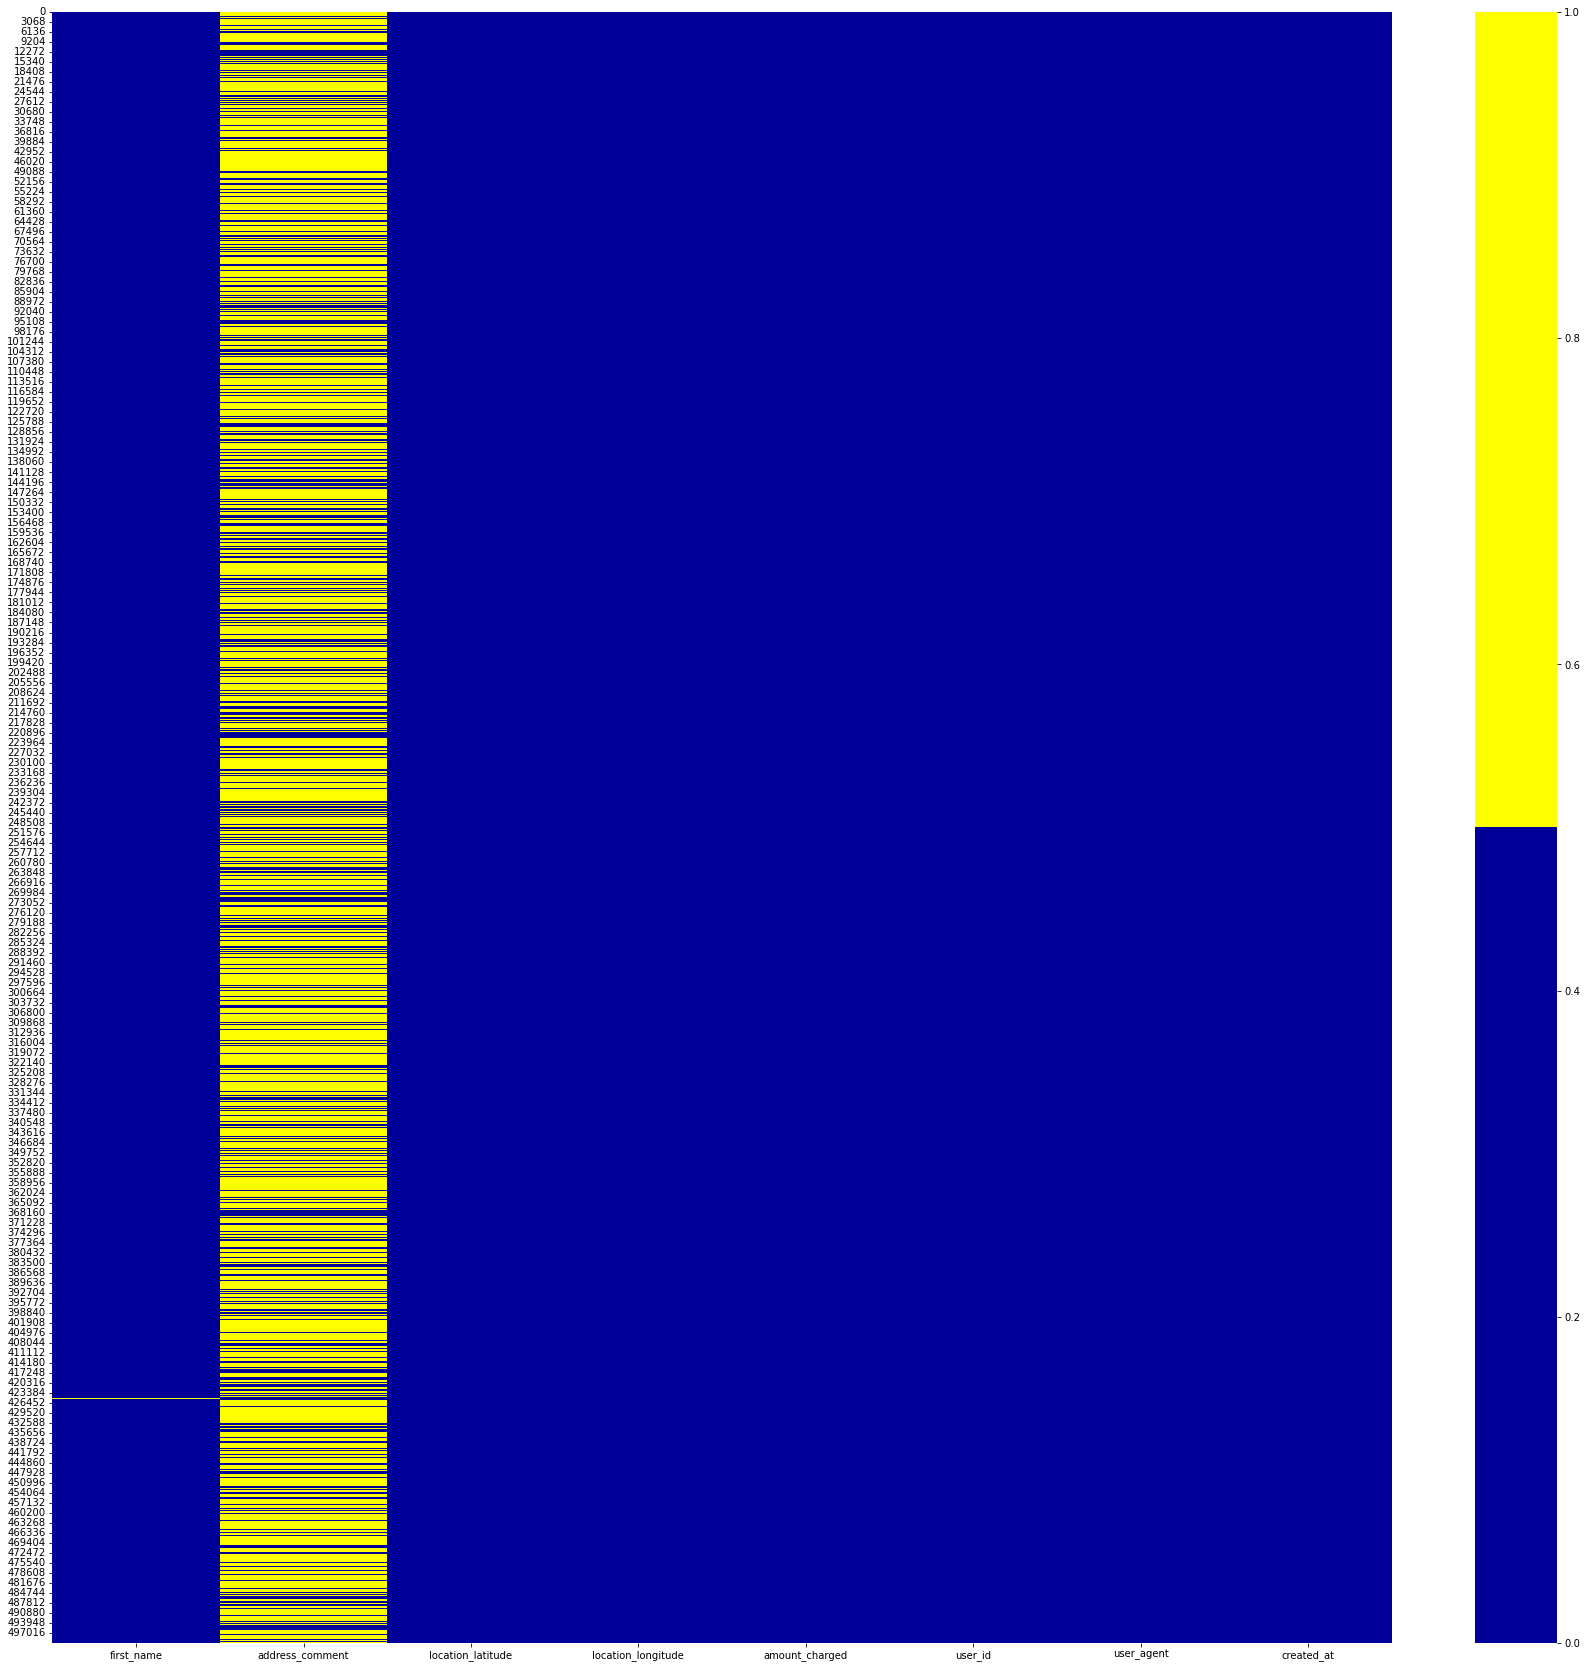

In [263]:
cols = df.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [264]:
df.duplicated().sum()

0

## Вывод

Таблица содержит 500000 строк и 8 колонок, в большинстве которых все данные присутствуют. Неполный столбец это `address_comment`, но его можно заполнять опционально, и это не влияет на анализ. Дубликаты в базе отсутствуют.

# Предобработка данных

Задача стоит сделать базу данных удобнее: переименовать столбцы, изменить индекс и тип данных у даты, немного сгруппировать координаты.

In [265]:
df.rename(columns = {'amount_charged':'Цена', 
                     'created_at':'Дата',
                    'user_id':'id заказчика'}, inplace=True)
df

,first_name,address_comment,location_latitude,location_longitude,Цена,id заказчика,user_agent,Дата
0,Марина,NaN,55.817654,37.829648,1359,323129982,MagnitApp_Android/2.0.8,12/25/2021 22:00
1,Sergey B.,NaN,55.816030,37.808985,0,297849704,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_7_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Mobile/15E148 Safari/604.1",9/30/2021 20:09
2,Елизавета,NaN,56.073574,37.365298,934,263040570,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-lavka/1.3.0.143889 YandexEatsKit/1.17.26 Lavka/Standalone",6/30/2021 20:43
3,Жанна Мкртчян,NaN,55.685777,37.544971,1104,304379733,ios(5.22.0),10/24/2021 15:35
4,Яна,"1573# код для входа во двор пешком, оставить заказ на крючке справа от двери (под звонком)",55.736684,37.687120,485,50560339,"Mozilla/5.0 (Linux; Android 10; M2010J19CG Build/QKQ1.200830.002; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/89.0.4389.86 Mobile Safari/537.36 yandex-taxi/4.26.0.121851 Android/10 (Xiaomi; M2010J19CG) Superapp/Eats EatsKit/1.25.0",7/11/2021 10:39
...,...,...,...,...,...,...,...,...
499995,Сергей,NaN,55.818918,37.658652,383,19509504,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-lavka/1.3.0.143889 YandexEatsKit/1.17.26 Lavka/Standalone",7/5/2021 16:26
499996,Ivana,NaN,55.754508,37.605674,1999,23487800,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/600.33.1.129129 YandexEatsKit/1.17.28 Superapp/Eats",6/21/2021 16:40
499997,Ivana,NaN,55.754444,37.606268,1659,23487800,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/600.33.1.129129 YandexEatsKit/1.17.28 Superapp/Eats",6/29/2021 23:34
499998,Ivana,NaN,55.756741,37.605337,979,23487800,"Mozilla/5.0 (iPhone; CPU iPhone OS 15_0_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/650.14.2.169973 YandexEatsKit/1.26.0 Superapp/Eats",11/2/2021 15:31


In [266]:
df['location_latitude'] = df['location_latitude'].round(4)
df['location_longitude'] = df['location_longitude'].round(4)

In [267]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [268]:
df.set_index('id заказчика',  inplace = True)
#df = df.reindex(columns=(['Дата'] +  list([a for a in df.columns if a !=  'Дата'] )))

In [269]:
df = df[['first_name',
         'Дата',
         'Цена',
         'location_latitude',
         'location_longitude',
         'address_comment',
         'user_agent']]

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 323129982 to 307475568
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   first_name          499811 non-null  object        
 1   Дата                500000 non-null  datetime64[ns]
 2   Цена                500000 non-null  int64         
 3   location_latitude   500000 non-null  float64       
 4   location_longitude  500000 non-null  float64       
 5   address_comment     150078 non-null  object        
 6   user_agent          500000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 30.5+ MB


### Вывод

В итоге получилась фукциональная таблица, с которой можно удобно работать. Очередность такая:

* `index` - уникальное id заказчика;
* `first_name ` - имя заказчика;
* `Дата` - дата заказа;
* `Цена` - стоимость заказа;
* `location_latitude` - координата широты адреса заказа;
* `location_longitude` - координата долготы адреса заказа;
* `address_comment` - комментарий курьеру или ресторану;
* `user_agent` - устройство с которого был сделан заказ.

# Исследовательский анализ данных

Нам предстоит рассмотреть и ответить на вопросы, связанные с ценой, как она меняется от времени заказа, от пола заказчика, от устройства, какие точки и места Москвы лидируют по количеству заказов и почему, какой процент отмены заказов.

## Цена

Первое, самое интересное - это цена заказа.

In [271]:
df.sort_values(by = ['Цена'], ascending = False)

,first_name,Дата,Цена,location_latitude,location_longitude,address_comment,user_agent
id заказчика,,,,,,,
477429,лев,2021-11-06 13:47:00,65929,55.7364,37.5990,NaN,ios(5.23.1)
293469517,Иосиф,2021-11-06 21:58:00,50349,55.7587,37.6404,NaN,"Mozilla/5.0 (Linux; Android 11; SM-A715F Build/RP1A.200720.012; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/95.0.4638.74 Mobile Safari/537.36 yandex-taxi/4.59.0.122125 Android/11 (samsung; SM-A715F) Superapp/Eats EatsKit/3.5.0"
21806664,Элла,2021-09-12 16:21:00,49990,55.8964,37.5211,"Склад «Деловые линии», ориентир ворота 11",ios(5.19.1)
293469517,Иосиф,2021-11-05 21:03:00,49224,55.7751,37.5500,Звонить +79952623110 !!!,"Mozilla/5.0 (iPad; CPU OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/650.14.2.169973 YandexEatsKit/1.26.0 Superapp/Eats"
293469517,Иосиф,2021-10-29 17:13:00,45939,55.7471,37.5834,+79952623110 - номер для связи,"Mozilla/5.0 (iPad; CPU OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/650.14.2.169973 YandexEatsKit/1.26.0 Superapp/Eats"
...,...,...,...,...,...,...,...
313927183,Игорь Цой,2021-11-25 13:19:00,0,55.8104,37.5937,NaN,android (2.60.1)
6593751,константин,2021-06-30 20:29:00,0,55.8606,37.5929,NaN,"Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-lavka/1.3.0.143889 YandexEatsKit/1.17.26 Lavka/Standalone"
1894879,Роман Арюков,2021-12-12 02:24:00,0,55.7829,37.5804,NaN,ios(5.27.0)


Отсортируем цены по убыванию и видим, что максимальная стоимость заказа была 65929 рублей. Но также замечаем много 0 в стоимости.

<AxesSubplot:ylabel='None'>

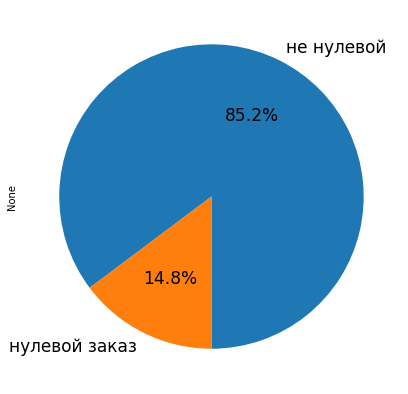

In [272]:
pd.Series(np.where(df['Цена']==0,'нулевой заказ','не нулевой')).value_counts().plot.pie(autopct='%1.1f%%', startangle=270, fontsize=17, figsize=(7,7))

Почти 15% заказов стоят 0. Что это значит? Либо эти заказы были отменены, либо за них заплатили наличными. Но давайте выясним. 

In [273]:
pd.pivot_table(df[df['Цена'] == 0], values = 'Цена',
               index = 'id заказчика',
               aggfunc=(len)).sort_values(by = ['Цена'])

,Цена
id заказчика,
141,1
256260959,1
256268574,1
256271049,1
256272579,1
...,...
183899923,15
68944630,19
294986146,19


In [274]:
df.loc[{84846150,294986146}]

C:\Users\MAx\AppData\Local\Temp\ipykernel_14756\2549881158.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df.loc[{84846150,294986146}]


,first_name,Дата,Цена,location_latitude,location_longitude,address_comment,user_agent
id заказчика,,,,,,,
294986146,Екатерина Утюпина,2021-11-23 14:51:00,0,55.7956,37.5411,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.85 YaBrowser/21.11.0.1996 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-12-23 15:28:00,0,55.5807,37.6517,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.85 YaBrowser/21.11.3.927 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-11-29 14:10:00,0,55.6459,37.5265,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.85 YaBrowser/21.11.1.932 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-12-29 15:36:00,0,55.6287,37.7407,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.85 YaBrowser/21.11.4.727 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-11-03 20:19:00,0,55.7101,37.6546,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 YaBrowser/21.9.2.169 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-11-23 18:25:00,0,55.7584,37.5492,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.85 YaBrowser/21.11.0.1996 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-11-04 14:39:00,0,55.7574,37.6337,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 YaBrowser/21.9.2.169 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-10-05 19:54:00,0,55.6843,37.5501,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 YaBrowser/21.8.3.614 Yowser/2.5 Safari/537.36"
294986146,Екатерина Утюпина,2021-10-19 15:56:00,0,55.8239,37.4972,"ТЕСТОВЫЙ ЗАКАЗ, НЕ ГОТОВИТЬ И НЕ ПРОБИВАТЬ, ЗАКАЗ ПОЗЖЕ БУДЕТ ОТМЕНЕН","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 YaBrowser/21.9.0.1044 Yowser/2.5 Safari/537.36"


Объединив id заказчиков, кто делает нулевые заказы и посмотрев на комментарии самых массовых, понимаем, что 0 означает отмененные заказы, деньги за которые не списываются.  

In [275]:
df_copy = df.copy()
df = df[df['Цена'] !=0]

Теперь, когда мы это понимаем, что отмененных заказов много и они существенно влияют на статистику, давайте убрём их и взглянем на какую в среднем цену заказывают еды.

<AxesSubplot:>

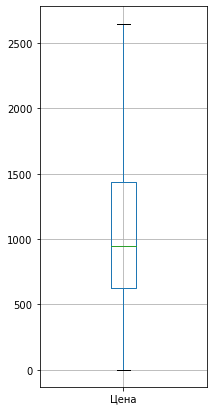

In [276]:
df.boxplot(column=['Цена'], figsize=(3, 7), showfliers=False)

In [277]:
df['Цена'].describe()

count    426194.000000
mean       1180.099258
std        1008.691024
min           1.000000
25%         622.000000
50%         944.000000
75%        1433.000000
max       65929.000000
Name: Цена, dtype: float64

Средний чек равен 1180 рублям, медиана - 944 руб.

<AxesSubplot:title={'center':'Процент заказавших на определенную сумму'}>

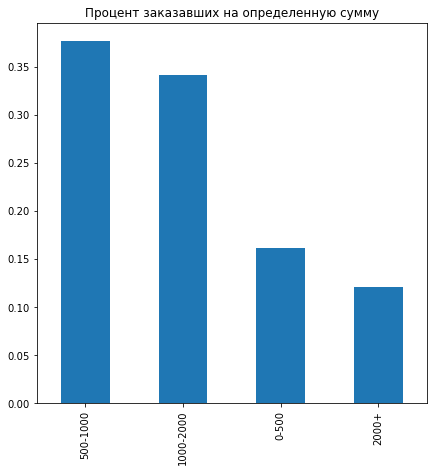

In [278]:
cut_labels_4 = ['0-500', '500-1000', '1000-2000', '2000+']
cut_bins = [0, 500, 1000, 2000, 200000]
df['Цена1'] = pd.cut(df['Цена'],
                       bins=cut_bins,
                       labels=cut_labels_4)
df['Цена1'].value_counts(normalize =True).plot(kind = "bar", figsize=(7,7),  title='Процент заказавших на определенную сумму' )


<AxesSubplot:title={'center':'Выручка от заказавших на определенную сумму'}, xlabel='Цена1'>

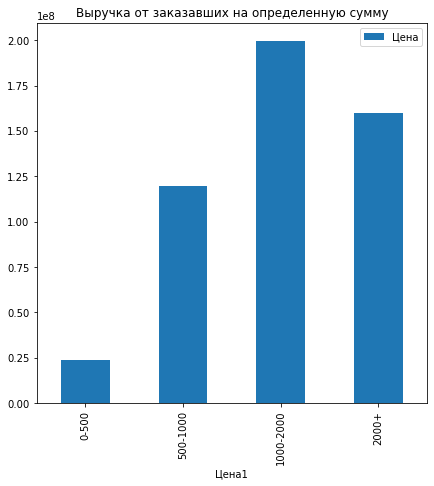

In [279]:
df.pivot_table('Цена', 'Цена1', aggfunc=(sum)).plot(kind = "bar", figsize=(7,7), title='Выручка от заказавших на определенную сумму')

Если смотреть упрощенно, разбив на ценовые категории, то наибольшее количество заказов делается в промежутках 500-1000 и 1000-2000 рублей. Выручку приносят немногочисленные дорогие заказы, а не большое количество мелких.

<AxesSubplot:>

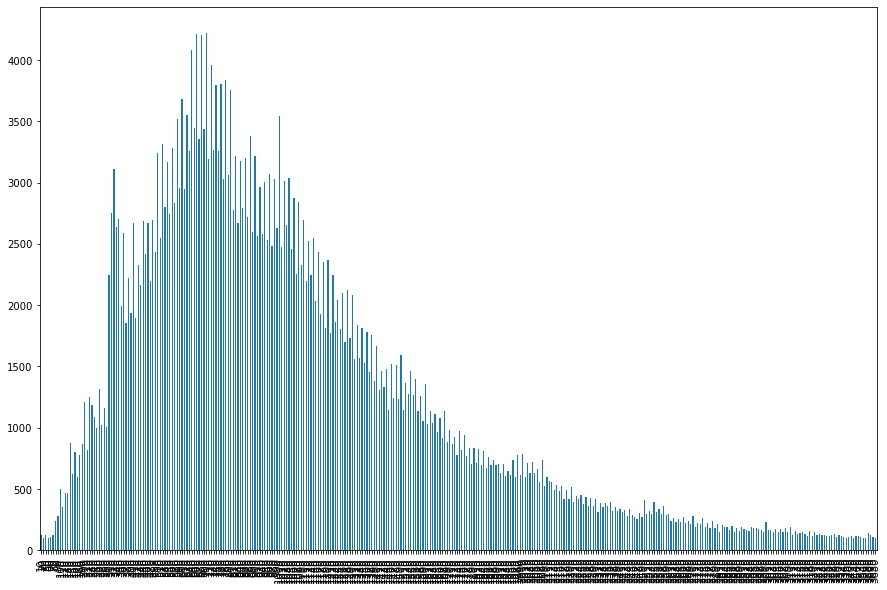

In [280]:
df['Цена'].round(-1).value_counts().sort_index(ascending=True)[df['Цена'].round(-1).value_counts() > 100].plot(kind = 'bar', figsize=(15, 10))

На гистограмме округленной до десятков видим, что

* происходит резкий рост заказов в районе 300 руб., вероятно минимальной цены заказа без купона, и потом падение количества;
* пик по количеству заказов происходит около 1000 руб.;
* заказов всегда чуть больше в районах, где цена кратна 500;
* с ростом цены (>1000 руб.) количество заказов резко падает, но около 1800 руб. падение становится плавным и даже возникает рост в районе 2000 руб.


### Время

<AxesSubplot:xlabel='Дата'>

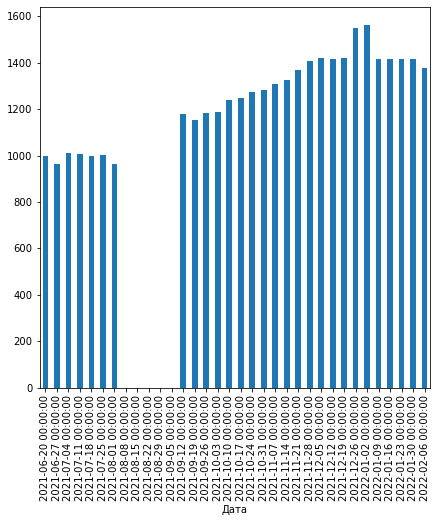

In [281]:
df.groupby([pd.Grouper(key='Дата', freq='w')])['Цена'].mean().plot(kind='bar', figsize=(7,7))

Теперь давайте посмотрим как цена меняется со временем. Если брать недельный отрезок за тот период, когда нам доступны данные, то видно

* постепенное ощутимое повышение средней цены заказа; 
* пики дорогих заказов в новогодние недели;
* отсутствие в базе данных за август.

<AxesSubplot:xlabel='Дата'>

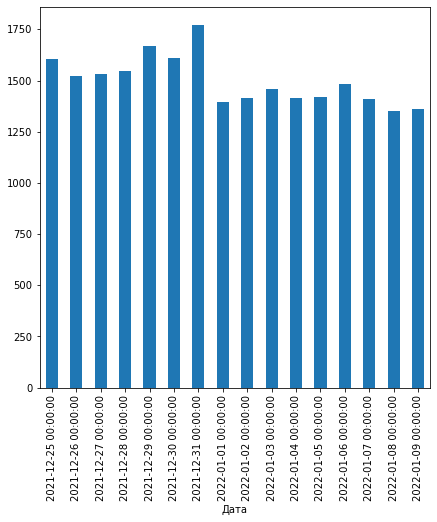

In [282]:
sa = df[(df['Дата'] > '2021-12-25') & (df['Дата'] < '2022-01-10')]
sa.groupby([pd.Grouper(key='Дата', freq='d')])['Цена'].mean().plot(kind='bar', figsize=(7,7))

На протяжении всех предновогодних и новогодних дней средний чек выше, но особенно 31 декабря, когда разница составляет 550 руб.

In [283]:
df.groupby(df['Дата'].dt.strftime("%H"))['Цена'].agg({'size','mean'})

,mean,size
Дата,,
00,1092.352562,15810
01,1320.044110,7980
02,1406.165283,4937
03,1390.752614,3060
04,1396.972702,1795
05,1428.957635,1133
06,1377.192918,819
07,1208.657609,920
08,968.598275,2203


По данным показательно, что в ночные часы средний чек существенно выше, в период завтрака, наоборот, ниже. Количество заказов примерно стабильно от 13 часов до 22 часов, после резкий спад.

In [284]:
df.groupby(df['Дата'].dt.strftime("%A"))['Цена'].agg({'size','mean'})

,mean,size
Дата,,
Friday,1245.320596,55924
Monday,1145.586573,57287
Saturday,1219.461622,76099
Sunday,1178.048027,74749
Thursday,1180.993448,53419
Tuesday,1135.577779,55111
Wednesday,1140.801380,53605


Если отталкиваться от дня недели, то заказов больше в выходные, но средний чек выше всего в пятницу.

### Лидеры заказов

In [285]:
op = pd.pivot_table(df[df['Цена'] != 0], values = 'Цена',
               index = 'id заказчика',
               aggfunc=(len,sum, 'mean'))
op.sort_values(by = ('len') , ascending=False)

,len,mean,sum
id заказчика,,,
293469517,59,6199.406780,365765
260062684,26,1140.038462,29641
8769566,26,3168.307692,82376
305586008,23,14.565217,335
1173942,23,1387.391304,31910
...,...,...,...
23939672,1,205.000000,205
23939848,1,450.000000,450
23940352,1,2019.000000,2019


In [286]:
op.sort_values(by = ('sum') , ascending=False)

,len,mean,sum
id заказчика,,,
293469517,59,6199.406780,365765
264337678,13,7371.538462,95830
8769566,26,3168.307692,82376
205914910,7,10017.428571,70122
477429,1,65929.000000,65929
...,...,...,...
327925132,1,1.000000,1
315035418,1,1.000000,1
314855668,1,1.000000,1


Сгруппировав все доставки по заказчикам, замечаем, что наибольшое количество заказов с большим отрывом и наибольшую выручку принес один человек. Посмотрим на карте куда он заказывал

In [287]:
lat = df.loc[293469517]['location_latitude']
lon = df.loc[293469517]['location_longitude']

map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)

for lat, lon in zip(lat, lon):
    folium.CircleMarker(location=[lat, lon], radius = 9, color="red", fill_opacity = 0.9).add_to(map)

map

На карте отмечены разные отели, рестораны, торговые центры и объекты офисной недвижимости в пределах центрального административного округ Москвы. Предположим, что заказчик занимается организацией мероприятий и для удобства пользуется сервисом доставки еды.

In [288]:
op[op['len'] > 10].sort_values(by = ('mean') , ascending=False)

,len,mean,sum
id заказчика,,,
264337678,13,7371.538462,95830
293469517,59,6199.406780,365765
229923350,15,4119.333333,61790
236938015,11,4067.272727,44740
921614,13,3337.230769,43384
...,...,...,...
16628838,18,165.722222,2983
42492087,17,158.235294,2690
3611110,17,93.882353,1596


In [289]:
df.loc[[305586008, 307643743]]

,first_name,Дата,Цена,location_latitude,location_longitude,address_comment,user_agent,Цена1
id заказчика,,,,,,,,
305586008,Екатерина,2021-11-03 22:01:00,5,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Миша Смирнов,2021-10-31 17:53:00,4,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Светлана Гутякулова,2021-10-31 15:27:00,4,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Олеся,2021-11-14 01:26:00,5,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Юрий,2021-11-14 01:23:00,5,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Маруся,2021-11-15 22:40:00,5,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Vladimir,2021-10-31 14:25:00,4,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Владислав,2021-11-11 20:07:00,4,55.7088,37.3821,NaN,android (2.59.0),0-500
305586008,Михаил,2022-01-07 21:17:00,44,55.7094,37.4423,NaN,android (2.59.0),0-500


In [290]:
lat = df.loc[[305586008, 307643743]]['location_latitude']
lon = df.loc[[305586008, 307643743]]['location_longitude']

map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)

for lat, lon in zip(lat, lon):
    folium.CircleMarker(location=[lat, lon], radius = 9, color="red", fill_opacity = 0.9).add_to(map)

map


Сортируя по среднему чеку и сделав фильтрацию минимум 10 заказов, я обратил внимание на наименьший средний чек, слишком он низок у последних заказчиков. Они все идут на разные имена, но по карте видим, что почти все заказы делаются в одно место за МКАДом и с одного устройства. Выгдядит это подозрительно и похоже на злоупотребление.

In [291]:
jk = pd.pivot_table(df, values = 'Цена',
               index = ['id заказчика', 'location_latitude','location_longitude'],
               aggfunc=(len,sum, 'mean')).sort_values(by = ('len') , ascending=False)
jk

,,,len,mean,sum
id заказчика,location_latitude,location_longitude,,,
307643743,55.7088,37.3821,18,33.944444,611
305586008,55.7088,37.3821,16,4.312500,69
311517903,55.7088,37.3821,9,34.000000,306
295435617,55.8275,37.4436,8,204.875000,1639
36964956,55.8477,37.3611,4,158.000000,632
...,...,...,...,...,...
8757077,55.8349,37.4893,1,308.000000,308
8756765,55.7215,37.6263,1,1037.000000,1037
8756252,55.8183,37.5021,1,2049.000000,2049


In [292]:
df.loc[(df['location_latitude'] == 55.7088) & (df['location_longitude'] == 37.3821)]

,first_name,Дата,Цена,location_latitude,location_longitude,address_comment,user_agent,Цена1
id заказчика,,,,,,,,
308506838,Мария Павлова,2021-11-06 13:30:00,34,55.7088,37.3821,NaN,ios(5.23.1),0-500
311586368,Екатерина Шинкевич,2021-11-17 06:12:00,34,55.7088,37.3821,NaN,android (2.59.0),0-500
311517903,София,2021-11-16 21:54:00,34,55.7088,37.3821,NaN,android (2.59.1),0-500
311630788,Залина,2021-11-17 12:53:00,4,55.7088,37.3821,NaN,android (2.59.0),0-500
307643743,Галина,2021-11-04 00:50:00,34,55.7088,37.3821,NaN,android (2.59.1),0-500
...,...,...,...,...,...,...,...,...
305586008,Егор,2021-10-31 16:13:00,4,55.7088,37.3821,NaN,android (2.59.0),0-500
288805711,Екатерина Смирнова,2021-11-07 12:18:00,34,55.7088,37.3821,NaN,android (2.59.0),0-500
288830081,Илья Успенский,2021-11-07 11:47:00,34,55.7088,37.3821,NaN,android (2.59.0),0-500


Всего 72 заказа с фантастически низкой ценой в разное время на этот адрес. Это точно не совпадение.

### Гендер

Далее давайте по именам определим пол заказчика. Для этого воспользуемся csv таблицой c 51529 именем на русском языке и сделаем внешнее левостороннее соединение. 

In [293]:
russian_names = pd.read_csv("russian_names.csv", encoding='utf-8', sep = ';', on_bad_lines='skip')
russian_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51529 entries, 0 to 51528
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                51529 non-null  int64 
 1   Name              51529 non-null  object
 2   Sex               51529 non-null  object
 3   PeoplesCount      51529 non-null  int64 
 4   WhenPeoplesCount  51529 non-null  object
 5   Source            51529 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


<AxesSubplot:ylabel='Sex'>

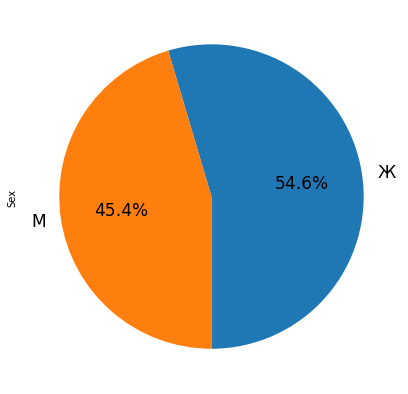

In [294]:
qz = df.merge(russian_names[['Name','Sex']], how='left',  left_on='first_name', right_on='Name')
qz['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=270, fontsize=17, figsize=(7,7))

Из найденных имен получается, что 54.6% заказов делают женщины и 45.4% мужчины. 

In [295]:
qz.pivot_table('Цена', index =[qz['Дата'].dt.strftime("%H"), 'Sex'], aggfunc=['count'])

count
           Цена
Дата Sex       
00   Ж     4057
     М     4545
01   Ж     1845
     М     2356
02   Ж     1043
     М     1611
03   Ж      602
     М     1004
04   Ж      377
     М      590
05   Ж      250
     М      346
06   Ж      175
     М      254
07   Ж      232
     М      278
08   Ж      658
     М      582
09   Ж     1833
     М     1179
10   Ж     3548
     М     2220
11   Ж     5554
     М     3484
12   Ж     7364
     М     4942
13   Ж     9177
     М     6413
14   Ж     9567
     М     7204
15   Ж     9674
     М     7417
16   Ж     9366
     М     7435
17   Ж     9228
     М     7123
18   Ж     9306
     М     7277
19   Ж     9767
     М     8173
20   Ж    10007
     М     8902
21   Ж     9605
     М     8615
22   Ж     8102
     М     7684
23   Ж     5999
     М     6298

Но если смотреть на количество заказов по часам заметно, что женщины не всегда делают большинство заказов. Ночью, начиная с 23 и до 7 часов мужчины заказывают больше.

In [296]:
qz.pivot_table('Цена','Sex', aggfunc=['mean'])

,mean
,Цена
Sex,
Ж,1172.500079
М,1237.791357


Средний чек у мужчин выше на 65 рублей.

### Комментарии

<AxesSubplot:ylabel='address_comment'>

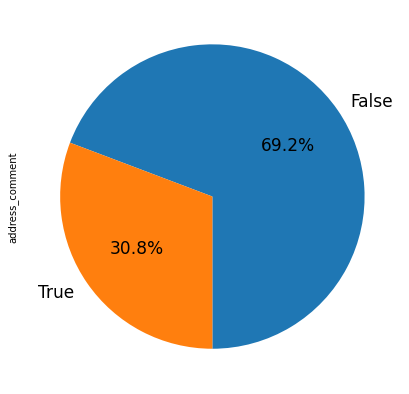

In [297]:
df['address_comment'].notnull().value_counts().plot.pie(autopct='%1.1f%%', startangle=270, fontsize=17, figsize=(7,7))

Комментарий к заказу оставляют в 31% случаев.

C:\Users\MAx\AppData\Local\Temp\ipykernel_14756\2934677600.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfff = df[df.index.value_counts()>=3]


<AxesSubplot:ylabel='address_comment'>

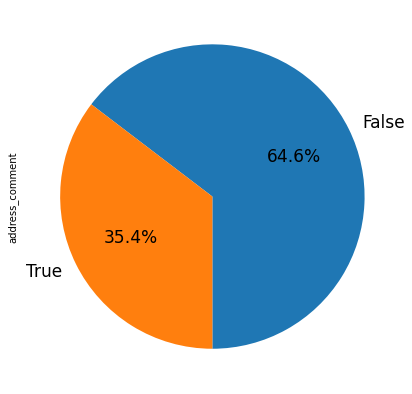

In [298]:
dfff = df[df.index.value_counts()>=3]
dfff['address_comment'].notnull().value_counts().plot.pie(autopct='%1.1f%%', startangle=270, fontsize=17, figsize=(7,7))

Но если заказчик опытный (три и более заказов), то комментарий он оставляет сильно охотнее.

In [299]:
df['address_comment'] = df['address_comment'].str.lower()
b = df[df['address_comment'].str.contains(pat = 'позвонить', na=False, regex=True)].shape[0]
c = df[df['address_comment'].notnull() == True].shape[0]
b/c


0.16667683857186452

В 16.6% комментариях к заказам встречается слова с корнем просят позвонить.

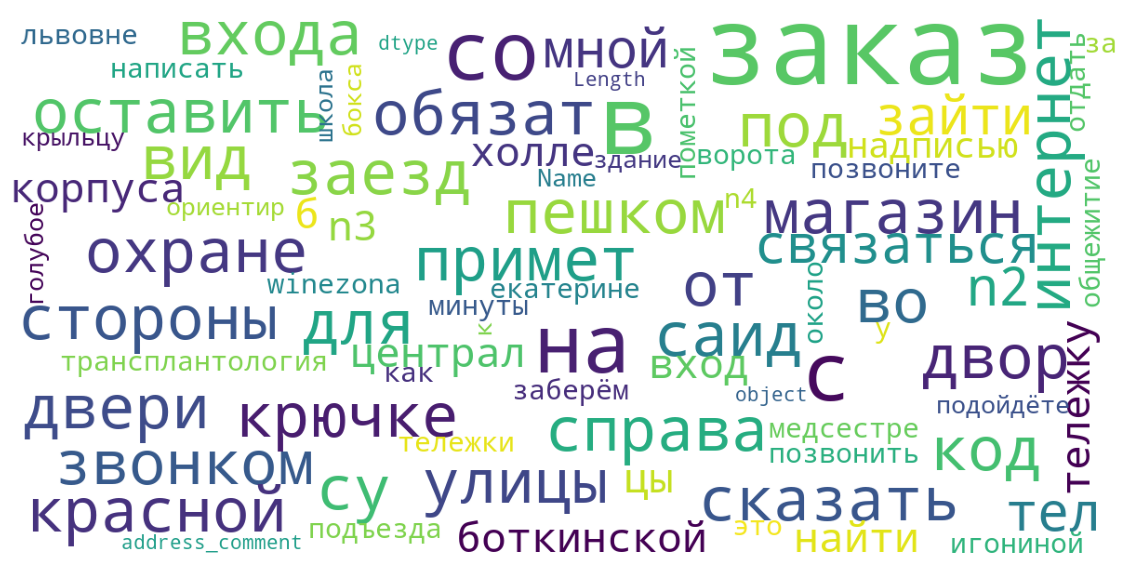

In [300]:
df['address_comment'] = df['address_comment'].str.lower()
de = df[df['address_comment'].notnull() == True].reset_index()['address_comment']

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(de, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(de))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(de)

Комментарии оставляет 31% людей. В облаке тэгов топ-100 самых встречаемых слов в комментариях.

### Устройства

In [301]:
df['user_agent'].unique()

array(['MagnitApp_Android/2.0.8',
       'Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-lavka/1.3.0.143889 YandexEatsKit/1.17.26 Lavka/Standalone',
       'ios(5.22.0)', ...,
       'Mozilla/5.0 (iPhone; CPU iPhone OS 12_5_5 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) yandex-taxi/650.24.0.190067 YandexEatsKit/1.26.0 Superapp/Eats',
       'Mozilla/5.0 (Linux; Android 11; SM-G985F Build/RP1A.200720.012; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/92.0.4515.105 Mobile Safari/537.36 com.yandex.lavka/1.5.0.1035610 Android/11 (samsung; SM-G985F) Lavka/Standalone EatsKit/3.0.0',
       'Mozilla/5.0 (Linux; Android 11; CPH2159 Build/RKQ1.200903.002; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/91.0.4472.120 Mobile Safari/537.36 yandex-taxi/4.44.2.121982 Android/11 (OPPO; CPH2159) Superapp/Eats EatsKit/3.0.0'],
      dtype=object)

Разбираясь с каких устройств делаются заказы, видим огромное количество разных версий, аппаратов, приложений. Но у приложений с Android, это слово указано. Давайте воспользуется этим и подсчитаем.

<AxesSubplot:ylabel='user_agent'>

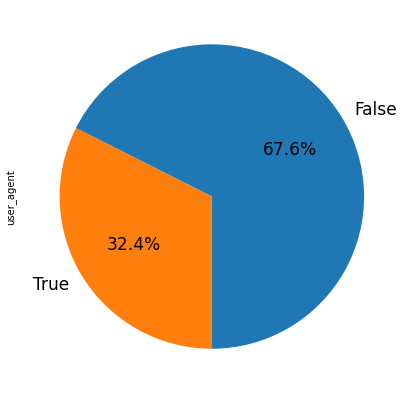

In [302]:
df['user_agent'] = df['user_agent'].str.lower()
df['user_agent'].str.contains('android', na=False, regex=True).value_counts().plot.pie(autopct='%1.1f%%', startangle=270, fontsize=17, figsize=(7,7))

In [303]:
df['user_agent'] = df['user_agent'].str.contains('android', na=False, regex=True)
df.pivot_table('Цена', 'user_agent',
               aggfunc=('mean'))

,Цена
user_agent,
False,1206.083767
True,1125.931764


Только 32.4% пользуются андройд устройством для заказа, и средний чек у таких заказов ниже.

## Вывод

По итогу получилось проанализировать все факторы доступные в таблице, влияющие на цену и количество заказов: время заказа, гендер заказчика, устройство с которого происходит заказ, процент отмены заказов.

# Карта

Теперь давайте посмотрим на карте по координатам из каких районов приходят заказы.

In [304]:
dfc = df.groupby(['location_latitude', 'location_longitude']).size()
dfc = dfc.reset_index(drop=False)
dfc.columns = ['location_latitude', 'location_longitude', 'T']

In [305]:
dfc = dfc.sort_values(by='T', ascending = False)[:300]
dfc

,location_latitude,location_longitude,T
166802,55.7908,37.5232,193
120871,55.7471,37.5391,136
165260,55.7894,37.5368,134
123473,55.7496,37.5374,118
167821,55.7917,37.7486,106
...,...,...,...
152285,55.7758,37.8357,27
29396,55.6326,37.7607,27
59094,55.6775,37.6344,27
55534,55.6729,37.5176,27


Найдем на карте 300 самых популярных мест для заказа и ранжируем их. Если больше 100 заказов красный круг, если от 50 до 100 желтый, остальные зеленый.

In [306]:
lat = dfc['location_latitude']
lon = dfc['location_longitude']
elevation = dfc['T']


def color_change(elev):
    if(elev < 50):
        return('green')
    elif(50 <= elev <100):
        return('orange')
    else:
        return('red')

#Create base map
map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)


#Plot Markers and add to 'marker_cluster'
for lat, lon, elevation in zip(lat, lon, elevation):
    folium.CircleMarker(location=[lat, lon], radius = 9, popup=str(elevation)+" шт.", fill_color=color_change(elevation), color="gray", fill_opacity = 0.9).add_to(map)

#Save the map
display(map)

Видим кучность в местах центра, ЮЗАО и ЮВАО. Если конкретно места:
* в деловом центре «Москва-Сити» наибольшая сосредоточенность, в том числе 2 красных круга;
* в районах Нового Арбата и Киевского вокзала похожая высокая плотность;
* рядом с ТЦ Авиапарк и на ул. Беговая
* квартал Савеловский сити
* комплекс зданий в Измайлово 
* м. Юго-западная

Практически все места это офисы с большой этажностью.

In [307]:
day_df = df[((df['Дата'].dt.hour>=10) & (df['Дата'].dt.hour<21)) & ((df['Дата'].dt.strftime("%A") != 'Saturday') & (df['Дата'].dt.strftime("%A") != 'Sunday'))]
day_df = day_df.groupby(['location_latitude', 
                         'location_longitude'])['Цена'].agg(['size','mean']).sort_values(by = 'size', ascending = False).reset_index(drop=False)[:300]

In [308]:
lat = day_df['location_latitude']
lon = day_df['location_longitude']
elevation = day_df['size']

#Create base map
map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)


#Plot Markers and add to 'marker_cluster'
for lat, lon, elevation in zip(lat, lon, elevation):
    folium.CircleMarker(location=[lat, lon], radius = 9, fill_color=color_change(elevation), color="gray", fill_opacity = 0.9).add_to(map)

#Save the map
map

После фильтрации по рабочим часам картина практичести не изменилась: те же группы точек, что и без фильтра.

In [309]:
nowork = df[((df['Дата'].dt.hour<10) | (df['Дата'].dt.hour>=21)) & ((df['Дата'].dt.strftime("%A") == 'Saturday') | (df['Дата'].dt.strftime("%A") == 'Sunday'))]
nowork = nowork.groupby(['location_latitude', 
                         'location_longitude'])['Цена'].agg(['size','mean']).sort_values(by = 'size', ascending = False).reset_index(drop=False)[:300]
lat = nowork['location_latitude']
lon = nowork['location_longitude']
elevation = nowork['size']

#Create base map
map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)


#Plot Markers and add to 'marker_cluster'
for lat, lon, elevation in zip(lat, lon, elevation):
    folium.CircleMarker(location=[lat, lon], radius = 9, fill_color=color_change(elevation), color="gray", fill_opacity = 0.9).add_to(map)

#Save the map
map

Если поставить нерабочие часы и выходные ситуация меняется:
* произошло рассредоточение точек по Москве
* меньше точек в центре и больше в спальных районах (очень заметно в ЮЗАО)

# Общий вывод

В ходе нашего исследования, мы в предобработали данные, где удалили персональные данные, заменили тип данных, воспользовались базой имен для получения дополнительной информации.

Провели анализ данных, в котором выяснили самый дорогой заказ и средний чек за период 2021-2022 года, узнали процент отказа от заказов, сравнили показатели между гендерами и временем заказа и нашли отличия, а также заметили потенциальное злоупотребление.

Общие выводы:
1. Цена заказов сильно различается, средний чек равен 944 руб., наибольшее количество заказов за 700 руб., количество заказов, стоимостью выше 2000 руб. малое, но выручка засчёт большей суммы выходит существеннее, чем у мелких;
2. Заказчики любят округлять цены и много тратить в новогодние недели;
3. Цены существенно выросли с августа по декабрь 2021 года;
4. Самые дорогие заказы ночью, самые бюджетные - утром, днем и вечером ситуация с ценой и количеством заказов стабильная;
5. Женщины заказываюn чаще мужчин, но в среднем дешевле;
6. Комментарии оставляет 31% людей, в которых во многих случаях пишут как добраться до них;
7. Плотнее всего заказывают в центре и недалеко чуть севернее и западнее от него.
8. Заказов с os Android меньше и они дешевле.